In [17]:
import json
import os
import cv2
import matplotlib.pyplot as plt

import cv2
import json
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell
import matplotlib.pyplot as plt
import numpy as np
from src.lib.opts import opts
from itertools import permutations
import copy
import math



In [21]:
img_number = 100

with open('data/synthetic_data/anno.json', 'r') as f:
    data = json.load(f)

img_data = data[img_number]

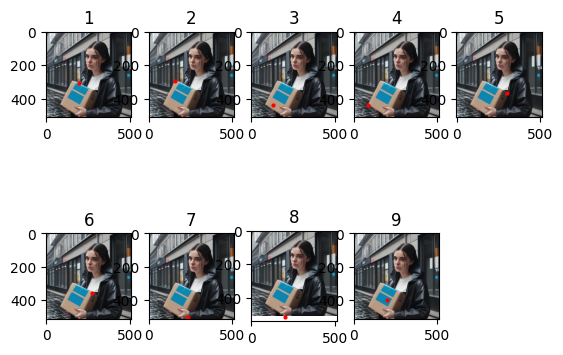

[[195, 309], [158, 294], [132, 437], [84, 439], [303, 364], [278, 356], [236, 503], [201, 516], [198, 400]]


In [22]:
img = plt.imread('data/synthetic_data/train/' + str(img_number) + '.jpg')

for i, p in enumerate(img_data["projection"]):
     plt.subplot(2,5,i+1)
     plt.imshow(img)
     plt.plot(p[0], p[1],'ro',markersize=2)
     plt.title(f"{i+1}")
plt.show()

points = img_data["projection"]
print(points)

In [26]:
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c = "cereal_box" # category

size = img_data["whd"]

camera_cereal=np.array([[663.0287679036459, 0, 300.2775065104167], [0, 663.0287679036459, 395.00066121419275], [0, 0, 1]])
camera_ford=np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)

bbox = {'kps': points, "obj_scale": size}
meta = {"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_cereal}

projected_points, point_3d_cam, scale, points_ori, bbox = pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)

True True


TypeError: cannot unpack non-iterable NoneType object